In [2]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [17]:
# Function to import the dataset

df = pd.read_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\train_set.csv")
df.head

<bound method NDFrame.head of         RecordId         X2         X3  X4  X5  X6          X7  X8   X9  X10  \
0              1  87.000000  34.118411   0   2   0  165.100000   1  829    2   
1              2  82.372284  31.573280   0   0   1  162.983897   1  724    0   
2              3  50.000000  27.771653   0   0   1  165.100000   1  895    2   
3              4  66.236109  26.515922   0   0   1  167.009549   1  637    0   
4              5  81.303299  20.843691   0   0   1  158.165419   0  564    0   
...          ...        ...        ...  ..  ..  ..         ...  ..  ...  ...   
246117    246118  65.149110  33.357948   0   0   1  156.317941   1  711    0   
246118    246119  48.000000  46.736176   0   0   1  157.000000   1  594    2   
246119    246120  57.472080  41.854115   1   0   0  189.868698   2  455    0   
246120    246121  66.000000  23.738662   1   0   1  168.000000   2  609    0   
246121    246122  50.257640  32.753911   0   2   0  173.665068   1  637    0   

        .

In [17]:
df.isnull().sum()

RecordId       0
X2          2590
X3          2139
X4             0
X5             0
            ... 
X75          456
X76          444
X77          447
X78          447
Y              0
Length: 79, dtype: int64

In [18]:
# balance_data = balance_data.drop(columns = 'RecordId')
df.dtypes

RecordId      int64
X2          float64
X3          float64
X4            int64
X5            int64
             ...   
X75         float64
X76         float64
X77         float64
X78         float64
Y             int64
Length: 79, dtype: object

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [20]:
# Assuming the dataframe 'df' has already been loaded
# Exclude the first column (RecordId) from imputation, since it's just an identifier
X = df.iloc[:, 1:78]

# Define the KNN imputer (you can set n_neighbors to control how many neighbors to use)
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the feature matrix (X)
X_imputed = knn_imputer.fit_transform(X)

# If you need to convert it back to a DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=df.columns[1:78])

# Optionally, you can add the 'RecordId' and 'Y' columns back to the DataFrame if needed
df_imputed['RecordId'] = df['RecordId']
df_imputed['Y'] = df['Y']

# Check the imputed dataframe
df_imputed.head()

KeyboardInterrupt: 

In [21]:
# Separating the target variable
X = df.values[:, 1:78] # 1 - 78 is 77 features... (78 is exclusive)
Y = df.values[:, 78]

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.15, random_state=42)


In [22]:
dt_model = DecisionTreeClassifier(max_depth=7, min_samples_split=100)
dt_model.fit(X_train, y_train)
md_predictions_probs = dt_model.predict_proba(X_test)
md_predictions_probs

array([[9.99371945e-01, 6.28055405e-04],
       [9.99371945e-01, 6.28055405e-04],
       [9.99371945e-01, 6.28055405e-04],
       ...,
       [9.99371945e-01, 6.28055405e-04],
       [9.99371945e-01, 6.28055405e-04],
       [9.99371945e-01, 6.28055405e-04]])

In [23]:
md_predictions_probs = md_predictions_probs[:, 1]
md_roc = roc_auc_score(y_test, md_predictions_probs)
md_roc

0.838160396577482

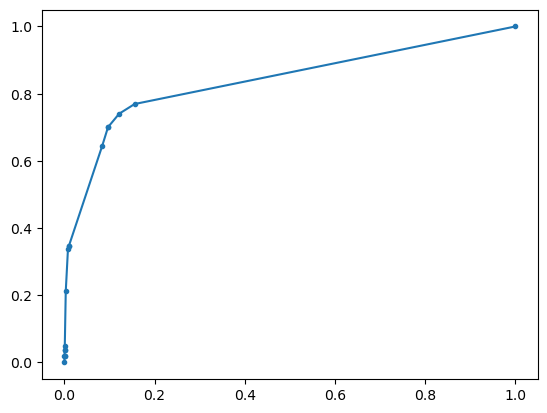

In [24]:
fpr, tpr, _ = roc_curve(y_test, md_predictions_probs, pos_label=1)
plt.plot(fpr, tpr, marker = '.')

In [25]:
test_data = pd.read_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\test_set.csv")

In [26]:
recordId = test_data['RecordId']
test_data = test_data.drop(columns = 'RecordId')
test_data.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78
0,79.000000,17.122318,0,0,1,170.200000,1,700,0,4,...,0.070000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.000000,43.693579,0,0,1,165.100000,1,814,0,7,...,0.050000,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.064225,23.998944,0,0,1,167.086735,1,662,0,7,...,0.006948,0.006948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61.846764,31.693449,0,3,1,182.355708,2,862,0,7,...,0.062613,0.033153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71.591991,20.086147,1,0,1,166.704917,2,335,0,6,...,0.014854,0.004854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Sample data
data = test_data

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
test_data = scaler.fit_transform(data)

In [28]:
prediction = dt_model.predict_proba(test_data)
prediction= prediction[:,1]

c:\Users\Ali\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [13]:
prediction = prediction.astype(int)

In [29]:
finaldf = pd.concat([recordId, pd.DataFrame(prediction, columns=['Y'])], axis=1)
finaldf
finaldf.to_csv("C:\\Users\Ali\\DataScience_Projects\\Kaggle_Competition\\test_results.csv", index= False)
